In [5]:
from modules.imports import * 
from modules.utils import *

In [6]:
X_train, X_test, y_train, y_test, scaler = load_and_preprocess_data(
    filename='Loan_Default_Cleaned.csv',
    target_column='Status'
)

In [7]:
def train_logistic_regression(X_train, y_train, X_test, y_test, handle_imbalance=None):
    
    if handle_imbalance == 'balanced':
        model = LogisticRegression(class_weight='balanced')
        imbalance_label = "Class Weights"
        print("Using balanced class weights for Logistic Regression.")
    
    elif handle_imbalance == 'smote':
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model = LogisticRegression()
        X_train, y_train = X_train_resampled, y_train_resampled
        imbalance_label = "SMOTE"
        print("Using SMOTE for class imbalance in Logistic Regression.")
    
    else:
        model = LogisticRegression()
        imbalance_label = "No Weights"
        print("Training Logistic Regression without handling class imbalance.")
    
    
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    
    plot_confusion_matrix(y_test, y_pred, y_probs, model_name=f'Logistic Regression ({imbalance_label})')
    plot_roc_curve(y_test, y_probs, model_name=f'Logistic Regression ({imbalance_label})')
    
    return model, y_pred, y_probs


Training Logistic Regression without handling class imbalance.


<Figure size 640x480 with 0 Axes>

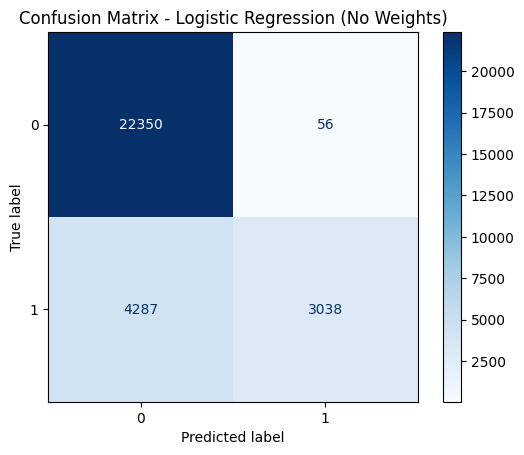

Logistic Regression (No Weights) Metrics:
Accuracy: 0.8539
Precision: 0.9819
Recall: 0.4147
F1 Score: 0.5832
ROC-AUC Score: 0.6851


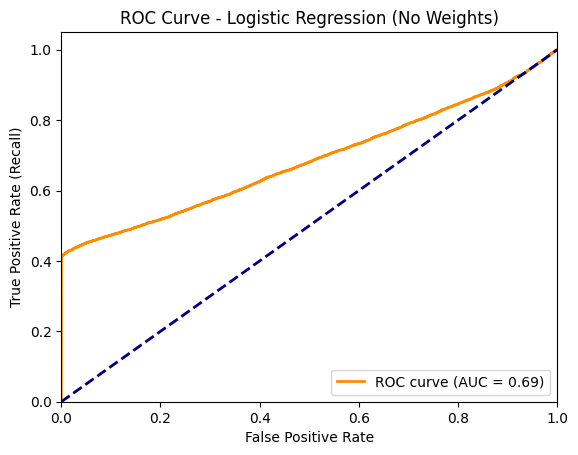

Logistic Regression (No Weights) ROC-AUC Score: 0.69
Using balanced class weights for Logistic Regression.


<Figure size 640x480 with 0 Axes>

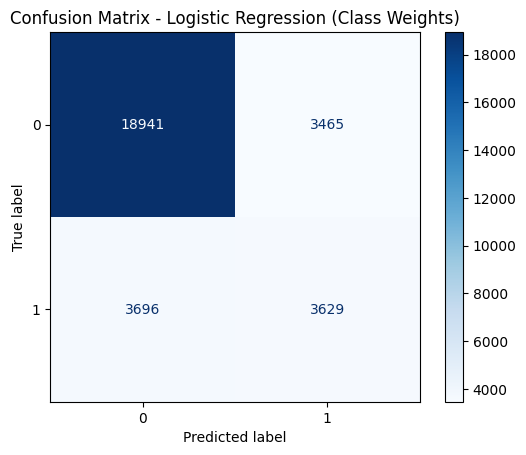

Logistic Regression (Class Weights) Metrics:
Accuracy: 0.7591
Precision: 0.5116
Recall: 0.4954
F1 Score: 0.5034
ROC-AUC Score: 0.6905


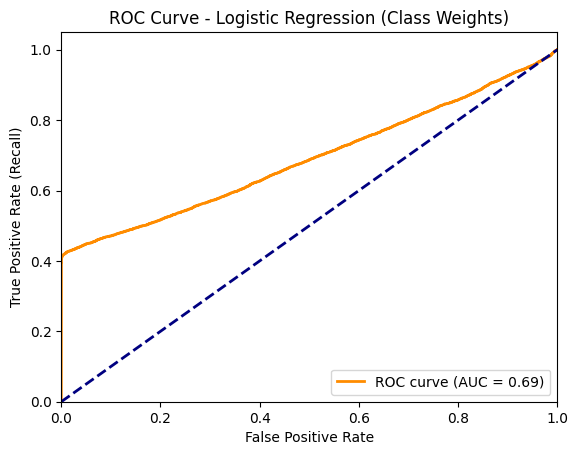

Logistic Regression (Class Weights) ROC-AUC Score: 0.69
Using SMOTE for class imbalance in Logistic Regression.


<Figure size 640x480 with 0 Axes>

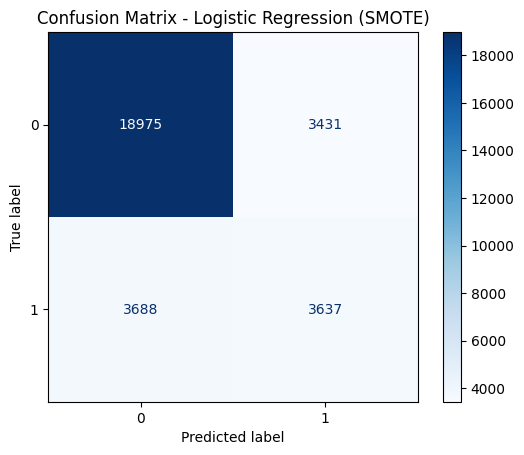

Logistic Regression (SMOTE) Metrics:
Accuracy: 0.7606
Precision: 0.5146
Recall: 0.4965
F1 Score: 0.5054
ROC-AUC Score: 0.6917


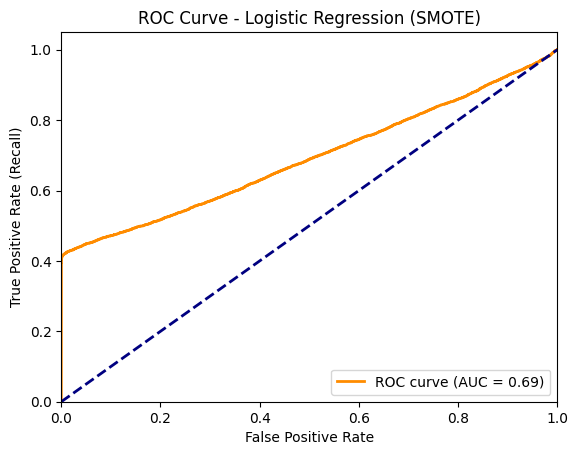

Logistic Regression (SMOTE) ROC-AUC Score: 0.69


In [8]:
model, y_pred, y_probs = train_logistic_regression(X_train, y_train, X_test, y_test, handle_imbalance=None)

model, y_pred, y_probs = train_logistic_regression(X_train, y_train, X_test, y_test, handle_imbalance='balanced')

model, y_pred, y_probs = train_logistic_regression(X_train, y_train, X_test, y_test, handle_imbalance='smote')
